# Проверка гипотез в анализе недвижимости.

В данном ноутбуке произведена работа по проверке гипотез путём методов статистического анализа, для проверки гипотез, которые были сформированы и выявлены в общеем анализе данных.

## Оглавление.

* ### [Импорт библиотек и загрузка данных](#Импорт-библиотек-и-загрузка-данных.)
* ### [Средняя цена трёхкомнатной квартиры в Северном и Северо-восточном округе](#Средняя-цена-трёхкомнатной-квартиры-в-Северном-и-Северо-восточном-округе.)
    * #### [Критерий Манна-Уитни](#Критерий-Манна-Уитни.)
    * #### [Доверительный интервал](#Доверительный-интервал.)
    * #### [Дополнительная проверка: цена за квадратный метр](#Дополнительная-проверка:-цена-за-квадратный-метр.)
    * #### [Дополнительная проверка: площадь](#Дополнительная-проверка:-площадь.)
* ### [Средний путь до метро в разрезе округов](#Средний-путь-до-метро-в-разрезе-округов.)
    * #### [Доверительные интервалы](#Доверительные-интервалы.)
    * #### [Результат дисперсионного анализа](#Результат-дисперсионного-анализа.)
* ### [Влияние этажности здания на другие параметры](#Влияние-этажности-здания-на-другие-параметры.)
    * #### [Коэффицент корреляции Спирмена](#Коэффицент-корреляции-Спирмена.)
    * #### [Результат проверки](#Результат-проверки.)
    
* ### [Итог проверки гипотез](#Итог-проверки-гипотез.)

## Импорт библиотек и загрузка данных.

In [1]:
'''
Импорт библиотек.
'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats
from scipy.stats import mannwhitneyu
from scipy.stats import spearmanr
from scipy.stats import f_oneway

%matplotlib inline

# Изменим размер графиков
sns.set(rc={'figure.figsize': (10,6)})

In [2]:
'''
Загружаем данные.
'''
df = pd.read_csv('../data/clean_apartment_data.csv')

In [3]:
df.head()

,price_per_square_metr,price,square,distance_to_station,total_floors,district,metro_station,apartment_type
0,258.21,10.07,39.0,0.8,13,Новомосковский,Прокшино,2-к квартира
1,392.27,7.10,18.1,0.4,9,Северо-западный,Октябрьское поле,Квартира-студия
2,207.76,16.33,78.6,0.8,33,Восточный,Бульвар Рокоссовского,3-к квартира
3,195.86,10.40,53.1,2.6,21,Новомосковский,Филатов луг,2-к квартира
4,180.07,15.36,85.3,2.6,21,Новомосковский,Филатов луг,3-к квартира


## Средняя цена трёхкомнатной квартиры в Северном и Северо-восточном округе.

Исходя из общего анализа данных, мы заметили, что **средняя цена трёхкомнатных квартир** в Северном и Северо-восточном округе стали сильно отличаться, т.к средняя цена на 1-к и 2-к квартиры в этих же округах была практически одинакова.

Мы имеем следующее:

 * Средняя цена на 3-к квартиру в Северном округе = **29.54 млн рублей.**
 * Средняя цена на 3-к квартиру в Северо-восточном округе = **21.91 млн рублей.**
 
*Составляем гипотезы:*
 * **H0:** Средняя цена на трёхкомнатную квартиру в обоих округах одинаковая.


 * **H1:** Средняя цена на трёхкомнатную квартиру неодинаковая. В Северном округе 3-к квартира стоит дороже.

Для начала стоит получить данные по каждому округу и посмотреть как там распределены данные.

In [4]:
# Получаем данные о 3-к квартирах в Северном округе.
north_df = df.query("apartment_type == '3-к квартира' & district == 'Северный'")

# Получаем данные о 3-к квартирах в Северо-восточном округе.
north_east_df = df.query("apartment_type == '3-к квартира' & district == 'Северо-восточный'")

In [5]:
north_df.describe()

,price_per_square_metr,price,square,distance_to_station,total_floors
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,338.308983,29.542881,81.537288,0.949153,22.847458
std,154.073437,24.827649,24.177768,0.607531,13.975118
min,194.670000,11.900000,56.700000,0.200000,5.000000
25%,247.615000,18.450000,69.900000,0.600000,13.000000
50%,312.700000,22.360000,78.500000,0.800000,21.000000
75%,359.295000,30.710000,83.850000,1.000000,33.000000
max,1132.780000,178.980000,177.000000,2.700000,58.000000


In [6]:
north_east_df.describe()

,price_per_square_metr,price,square,distance_to_station,total_floors
count,39.000000,39.000000,39.000000,39.000000,39.000000
mean,253.468718,21.905385,87.735897,0.933333,28.025641
std,54.100535,7.334169,27.551182,0.592645,16.358624
min,196.380000,11.500000,50.000000,0.200000,5.000000
25%,214.555000,16.525000,71.600000,0.700000,16.000000
50%,231.120000,19.770000,81.200000,0.800000,32.000000
75%,268.555000,25.965000,93.800000,0.900000,33.000000
max,420.410000,45.530000,143.700000,2.900000,56.000000


<AxesSubplot:>

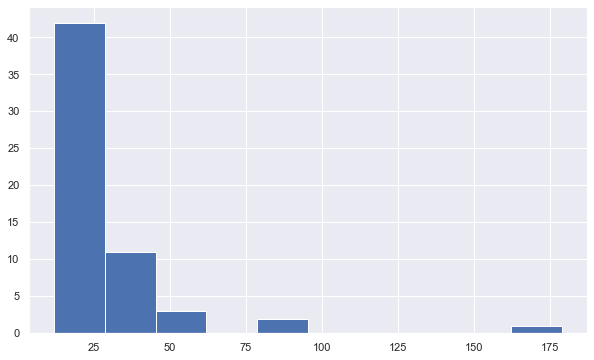

In [7]:
north_df['price'].hist()

<AxesSubplot:>

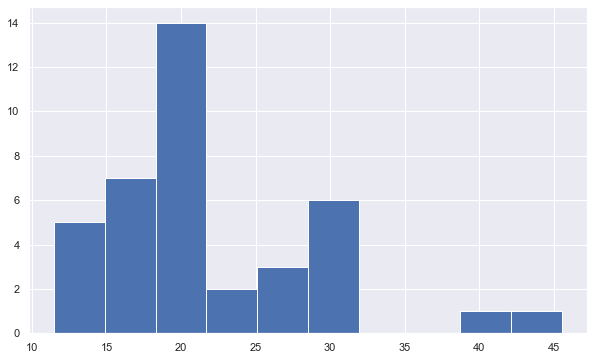

In [8]:
north_east_df['price'].hist()

Мы видим, что наши данные:
 * **Унимодальны**
 * **Ассиметричны**
 * **Имеют выбросы**
 
Из этого, мы можем смело сказать, что **нормальное распределение** здесь отсутствует. Использовать **t-критерий Стьюдента** в расчёте p-уровня значимости мы не можем. Однако существует непараметрический аналог Стьюдента, а именно критерий **Манна-Уитни**.


Так же будет неплохо проверить нашу гипотезу с помощью **доверительных интервалов**.

Что нам нужно сделать:
   * Взять выборки из наших групп одинаковой длинны.
   * Узнать **p-уровень значимости** с помощью критерия Манна-Уитни.
   * Построить **доверительный интервал** для наших выборок.

### Критерий Манна-Уитни.

In [9]:
def check_hypothesis_with_mannwhitneyu(first_data, second_data, sample_count=15, number_of_check=20, show_list=True):
    '''
    Функция, которая использует тест Манна-Уитни n-ое количество раз, чтобы посмотреть, какая гипотеза появляется больше всего.
    
    Параметры:
    first_data - данные из первой группы.
    second_data - данные из второй группы.
    sample_count - кол-во наблюдений в выборке(по умолчанию = 25).
    number_of_check - количество проведения теста(по умолчанию = 20).
    show_list - показывать список значений p-уровня значимостей после расчёта (по умолчанию True).
    
    Возращает: список p-уровня значимостей из number_of_check тестов.
    '''

    result_list = []
    null_hypothesis_count = 0
    alt_hypothesis_count = 0
    
    for i in range(number_of_check):
        
        # Получаем выборку для каждой группы.
        first_sample = first_data.sample(n=sample_count)
        second_sample = second_data.sample(n=sample_count)
    
        stat, p = mannwhitneyu(first_sample, second_sample)
        result_list.append(p)
        
        if p > 0.05:
            null_hypothesis_count += 1
        else:
            alt_hypothesis_count += 1
        
    print('Результат тестирования:')
    print(f'H0 = {null_hypothesis_count}')
    print(f'H1 = {alt_hypothesis_count}\n')
    
    if show_list == True:
        print(f'Список значений:')
        print(result_list)

    return result_list

In [10]:
result = check_hypothesis_with_mannwhitneyu(north_east_df['price'], north_df['price'])

Результат тестирования:
H0 = 20
H1 = 0

Список значений:
[0.8519177555606353, 0.8034411566561627, 0.575468379776696, 0.8357050269952793, 0.21337370709311831, 0.6482039260122094, 0.3195059648919748, 0.5202360544447003, 0.21337370709311831, 0.2371039611073864, 0.6186695570822622, 0.21337370709311831, 0.48073111045562256, 0.9174021048159461, 0.9174021048159461, 1.0, 0.9009605329267507, 0.26275304114766074, 0.9669147771731937, 0.3724053049155098]


<div class="alert alert-warning" role="alert">
    Во всех случаях, мы видим, что значения склоняются к <b>p-value</b> больше 5%. Однако попробуем провести этот эксперимент не 20, а 100 раз.
</div>

In [11]:
result = check_hypothesis_with_mannwhitneyu \
                    (north_east_df['price'],
                     north_df['price'],
                     number_of_check=100,
                     show_list=False)

Результат тестирования:
H0 = 88
H1 = 12



<div class="alert alert-warning" role="alert">
    В <b>88</b> случаях из <b>100</b> у нас верна <b>нулевая гипотеза.</b><br>
    Однако будет не лишним посмотреть как расположены наши средние на доверительном интервале.
</div>

### Доверительный интервал.

In [12]:
def mean_confidence_interval(data, confidence=0.95):
    '''
    Функция, которая делает расчёт для доверительного интервала.
    
    Параметры:
    data - выборка данных.
    confidence - уровень вероятности доверительного интервала (по умолчанию 95%).
    
    Возращает:
    m - среднее значение выборки.
    m-h - нижняя граница интервала.
    m+h - верхняя граница интервала.
    '''
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

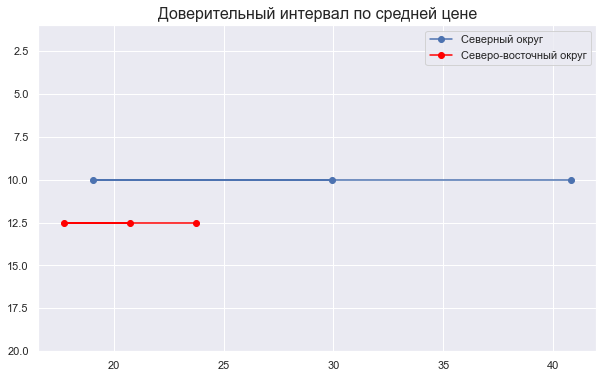

In [13]:
# Создаём выборки.
north_sample = north_df['price'].sample(15)
north_east_sample = north_east_df['price'].sample(15)

# Получаем значения интервалов.
north_interval = mean_confidence_interval(north_sample)
north_east_interval = mean_confidence_interval(north_east_sample)

# Строим график.
north_interval_y = (10, 10, 10)
north_east_interval_y = (12.5, 12.5, 12.5)

tuple_legend = (
    'Северный округ',
    'Северо-восточный округ'
)

plt.title('Доверительный интервал по средней цене', fontsize=16)

plt.ylim(20)

plt.plot(north_interval,
         north_interval_y,
         marker='o')

plt.plot(north_east_interval,
         north_east_interval_y,
         color='red',
         marker='o')

plt.legend(tuple_legend)

plt.show()

<div class="alert alert-success" role="alert">
    У нас достаточно оснований принять <b>нулевую гипотезу.</b>
</div>

### Дополнительная проверка: цена за квадратный метр.

Благодаря тесту Манна-Уитни, мы приняли гипотезу, гласящую о том, что средняя цена на квартиры в округах одинаковая. Было бы неплохо узнать является ли средняя цена за квадратной метр одинаковой тоже:

*Составляем гипотезы:*
 * **H0:** Средняя цена квадратного метра на трёхкомнатную квартиру в обоих округах одинаковая.


 * **H1:** Средняя цена квадратного метра на трёхкомнатную квартиру неодинаковая. В Северном округе 3-к квартира стоит дороже.

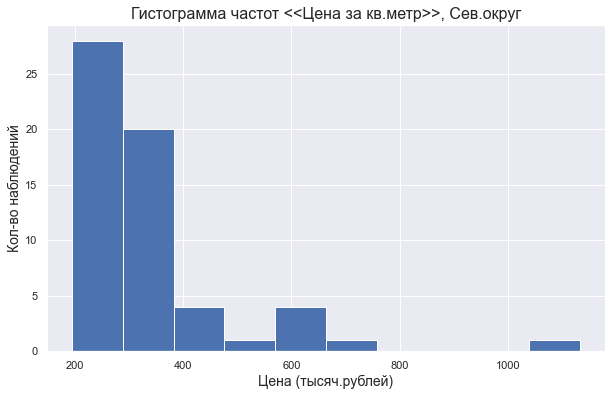

In [14]:
north_df['price_per_square_metr'].hist()
plt.title('Гистограмма частот <<Цена за кв.метр>>, Сев.округ', fontsize=16)
plt.xlabel('Цена (тысяч.рублей)', fontsize=14)
plt.ylabel('Кол-во наблюдений', fontsize=14)
plt.show()

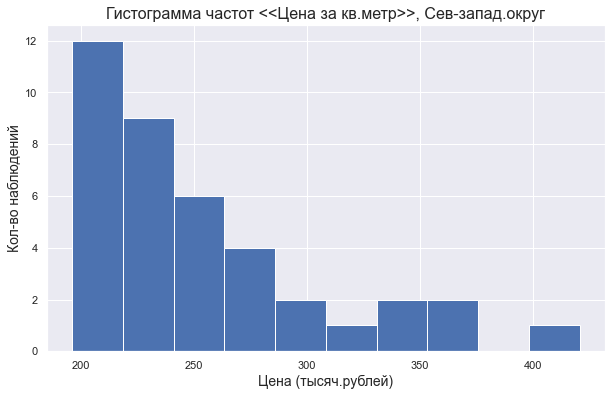

In [15]:
north_east_df['price_per_square_metr'].hist()
plt.title('Гистограмма частот <<Цена за кв.метр>>, Сев-запад.округ', fontsize=16)
plt.xlabel('Цена (тысяч.рублей)', fontsize=14)
plt.ylabel('Кол-во наблюдений', fontsize=14)
plt.show()

Мы видим, что наши данные:
 * **Унимодальны**
 * **Ассиметричны**
 * **Имеют выбросы**
 
Вновь применим критерий **Манна-Уитни.**

In [16]:
result = check_hypothesis_with_mannwhitneyu \
            (north_east_df['price_per_square_metr'],
             north_df['price_per_square_metr'],
             number_of_check=100,
             show_list=False)

Результат тестирования:
H0 = 40
H1 = 60



Как мы можем наблюдать, мы видим довольно неоднозначную картину в проверке гипотезы.


С одной стороны, **альтернативная гипотеза** проявилась на порядок больше чем нулевая гипотеза, однако и нулевой гипотезы в нашем исследование не мало.

С другой стороны, при сравнение средних цен за квартиру, мы пришли к выводу, что средние цены в округах не особо сильно и отличаются. 

Возможно, цена трёхкомнатнхы квартир в этих округах действительно одинаковая, а на квадратуру влияет какая-то другая переменная. Высока вероятность, что влияет на цену квадратного метра переменная **путь до метро(distance_to_station)**.

Есть вероятность, что на такой результат повлияло и то, что конкретно числовое представление данных отличается (т.е в буквальном смысле значение цены за квадратный метр больше чем цена квартиры, потому что мы храним там абстрактные значения тысяч и миллионов).

Стоит попробовать представить цену за квадратный метр в тех же миллионах и посмотреть, изменится ли результат:

In [17]:
mln_north_price_sqr_data = north_df['price_per_square_metr'].copy()
mln_north_east_price_sqr_data = north_east_df['price_per_square_metr'].copy()

mln_north_price_sqr_data = mln_north_price_sqr_data / 1000
mln_north_east_price_sqr_data = mln_north_east_price_sqr_data / 1000

result = check_hypothesis_with_mannwhitneyu \
            (mln_north_east_price_sqr_data,
             mln_north_price_sqr_data,
             number_of_check=100,
             show_list=False)

Результат тестирования:
H0 = 39
H1 = 61



Значение **p-value** колеблятся, однако учитывая, что в случае **price** у нас была верна нулевая гипотеза, то здесь я так же склонюсь к этому варианту.

### Дополнительная проверка: площадь.

In [18]:
# Проверим разные ли площади
result = check_hypothesis_with_mannwhitneyu \
            (north_east_df['square'],
             north_df['square'],
             number_of_check=100,
             show_list=False)

Результат тестирования:
H0 = 91
H1 = 9



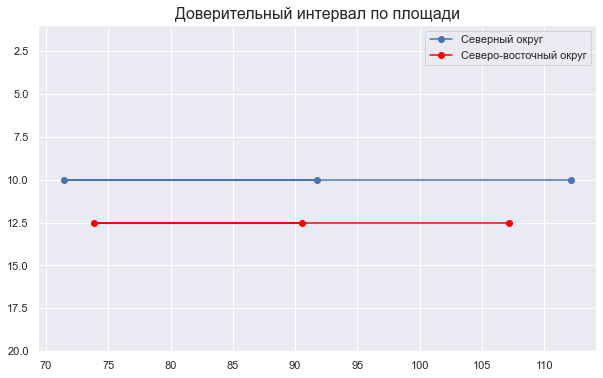

In [19]:
# Создаём выборки.
north_sample = north_df['square'].sample(15)
north_east_sample = north_east_df['square'].sample(15)

# Получаем значения интервалов.
north_interval = mean_confidence_interval(north_sample)
north_east_interval = mean_confidence_interval(north_east_sample)

# Строим график.
north_interval_y = (10, 10, 10)
north_east_interval_y = (12.5, 12.5, 12.5)

tuple_legend = (
    'Северный округ',
    'Северо-восточный округ'
)

plt.title('Доверительный интервал по площади', fontsize=16)

plt.ylim(20)

plt.plot(north_interval,
         north_interval_y,
         marker='o')

plt.plot(north_east_interval,
         north_east_interval_y,
         color='red',
         marker='o')

plt.legend(tuple_legend)

plt.show()

## Средний путь до метро в разрезе округов.

В общем анализе мы выявили, что средний путь до метро в разрезе округов отличается, следовательно мы имеем следующее:

*Составляем гипотезы:*
 * **H0:** Средняя путь до метро в каждом округе одинаковый


 * **H1:** Средний путь до метро в каждом округе отличается или есть **хотя бы** один округ, отличающийся от других.
 
Так как мы сравниваем среднее значение нескольких групп, то использовать парный критерий Стьюдента или Манна-Уитни мы уже не можем. В данной задаче нам поможет **однофакторный дисперсионный анализ.**

В качестве:
  * Независимой переменной выступает столбец **district**.
  * Зависимой переменной выступает **distance_to_station**.
  
Прежде всего необходимо сделать выборку. Я бы хотел вновь посмотреть на кол-во записей и их среднее значение в разрезе округов.

In [20]:
means_by_district = df[['distance_to_station', 'district']].groupby('district').agg('mean').reset_index()
means_by_district = means_by_district.round(2)

# Кол-во квартир по округам.
count_by_district = df[['price', 'district']].groupby('district').agg('count').reset_index()
count_by_district.rename({'price': 'count'}, axis=1, inplace=True)

# Добавим кол-во квартир к предыдущей таблице со средними значениями.
result = means_by_district.merge(count_by_district, how='inner', on='district')

# Вывод.
result

,district,distance_to_station,count
0,Восточный,0.83,176
1,Западный,0.79,307
2,Новомосковский,1.37,277
3,Северный,0.85,300
4,Северо-восточный,0.86,208
5,Северо-западный,1.02,107
6,Центральный,0.66,259
7,Юго-восточный,0.84,193
8,Юго-западный,1.33,173
9,Южный,1.08,343


Записей довольно много, пусть размер выборки будет равен 60.

In [21]:
# Создаём выборки.
east_data = df[df['district'] == 'Восточный']['distance_to_station'].sample(60)
west_data = df[df['district'] == 'Западный']['distance_to_station'].sample(60)
new_moscow_data = df[df['district'] == 'Новомосковский']['distance_to_station'].sample(60)
north_data = df[df['district'] == 'Северный']['distance_to_station'].sample(60)
north_east_data = df[df['district'] == 'Северо-восточный']['distance_to_station'].sample(60)
north_west_data = df[df['district'] == 'Северо-западный']['distance_to_station'].sample(60)
centr_data = df[df['district'] == 'Центральный']['distance_to_station'].sample(60)
south_east_data = df[df['district'] == 'Юго-восточный']['distance_to_station'].sample(60)
south_west_data = df[df['district'] == 'Юго-западный']['distance_to_station'].sample(60)
south_data = df[df['district'] == 'Южный']['distance_to_station'].sample(60)

F, p = f_oneway(
    east_data,
    west_data,
    new_moscow_data,
    north_data,
    north_east_data,
    north_west_data,
    centr_data,
    south_east_data,
    south_west_data,
    south_data
)

if p < 0.05:
    if p < 0.005:
        print('P-value настолько низкое, что можно со 100% вероятностью принять альтернативную гипотезу.')
    else:
        print('Отвергаем нулевую гипотезу')
else:
    print('Принимаем нулевую гипотезу.')

P-value настолько низкое, что можно со 100% вероятностью принять альтернативную гипотезу.


<div class="alert alert-warning" role="alert">
    По сути, нам достаточно этого, чтобы принять альтернативную гипотезу, однако стоит построить доверительный интервал, возможно мы сможем найти что-нибудь интересное.
</div>

### Доверительные интервалы.

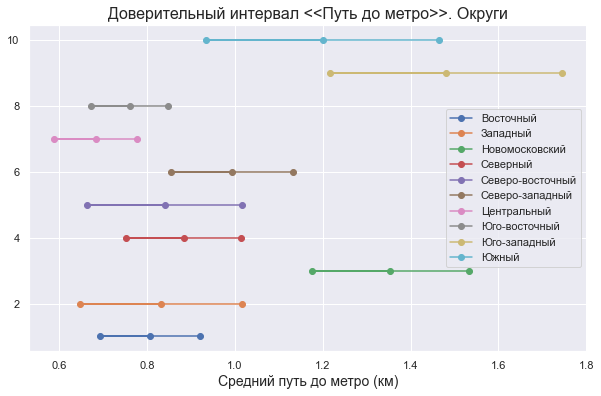

In [22]:
'''
Доверительные интервалы.
'''
east_data_y = np.ones(3)
west_data_y = []
new_moscow_data_y = []
north_data_y = []
north_east_data_y = []
north_west_data_y = []
centr_data_y = []
south_east_data_y = []
south_west_data_y = []
south_data_y = []

for i in east_data_y:
    west_data_y.append(i + 1)
    new_moscow_data_y.append(i + 2)
    north_data_y.append(i + 3)
    north_east_data_y.append(i + 4)
    north_west_data_y.append(i + 5)
    centr_data_y.append(i + 6)
    south_east_data_y.append(i + 7)
    south_west_data_y.append(i + 8)
    south_data_y.append(i + 9)
    
plt.plot(mean_confidence_interval(east_data), east_data_y, marker='o')
plt.plot(mean_confidence_interval(west_data), west_data_y, marker='o')
plt.plot(mean_confidence_interval(new_moscow_data), new_moscow_data_y, marker='o')
plt.plot(mean_confidence_interval(north_data), north_data_y, marker='o')
plt.plot(mean_confidence_interval(north_east_data), north_east_data_y, marker='o')
plt.plot(mean_confidence_interval(north_west_data), north_west_data_y, marker='o')
plt.plot(mean_confidence_interval(centr_data), centr_data_y, marker='o')
plt.plot(mean_confidence_interval(south_east_data), south_east_data_y, marker='o')
plt.plot(mean_confidence_interval(south_west_data), south_west_data_y, marker='o')
plt.plot(mean_confidence_interval(south_data), south_data_y, marker='o')

plt.legend(result['district'].unique())
plt.title('Доверительный интервал <<Путь до метро>>. Округи', fontsize=16)
plt.xlabel('Средний путь до метро (км)', fontsize=14)
plt.show()

Исходя из доверительного интервала, мы видим, что все отрезки не пересекаются друг с другом, однако мы видим, что:
 * Отрезки **Южного, Юго-западного** и **Новомосковсокого** округа пересекаются между собой.
 * Отрезки **Восточного, Западного, Северного, Северо-восточного, Северо-западного** и **Юго-восточного** округа пересекаются между собой.
 
Давайте посмотрим на дисперсионный анализ для этих округов отдельно.

In [23]:
F, p = f_oneway(
    new_moscow_data,
    south_west_data,
    south_data
)

if p < 0.05:
    if p < 0.005:
        print('P-value настолько низкое, что можно со 100% вероятностью принять альтернативную гипотезу.')
    else:
        print('Отвергаем нулевую гипотезу')
else:
    print('Принимаем нулевую гипотезу.')

Принимаем нулевую гипотезу.


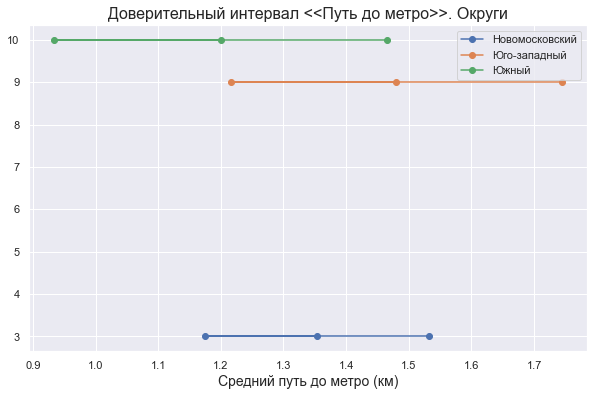

In [24]:
plt.plot(mean_confidence_interval(new_moscow_data), new_moscow_data_y, marker='o')
plt.plot(mean_confidence_interval(south_west_data), south_west_data_y, marker='o')
plt.plot(mean_confidence_interval(south_data), south_data_y, marker='o')

titles = ('Новомосковский', 'Юго-западный', 'Южный')
plt.legend(titles)
plt.title('Доверительный интервал <<Путь до метро>>. Округи', fontsize=16)
plt.xlabel('Средний путь до метро (км)', fontsize=14)
plt.show()

In [25]:
F, p = f_oneway(
    east_data,
    west_data,
    north_data,
    north_east_data,
    centr_data,
    south_east_data,
)

if p < 0.05:
    if p < 0.005:
        print('P-value настолько низкое, что можно со 100% вероятностью принять альтернативную гипотезу.')
    else:
        print('Отвергаем нулевую гипотезу')
else:
    print('Принимаем нулевую гипотезу.')

Принимаем нулевую гипотезу.


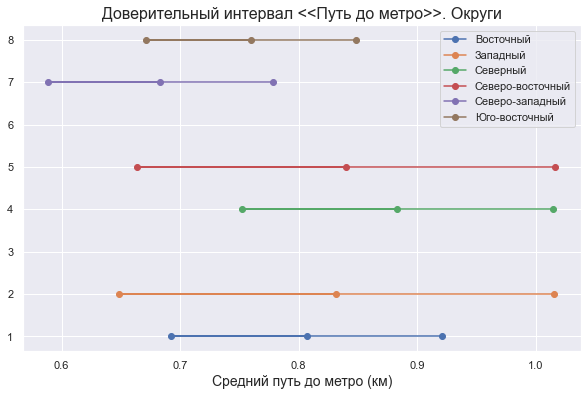

In [26]:
plt.plot(mean_confidence_interval(east_data), east_data_y, marker='o')
plt.plot(mean_confidence_interval(west_data), west_data_y, marker='o')
plt.plot(mean_confidence_interval(north_data), north_data_y, marker='o')
plt.plot(mean_confidence_interval(north_east_data), north_east_data_y, marker='o')
plt.plot(mean_confidence_interval(centr_data), centr_data_y, marker='o')
plt.plot(mean_confidence_interval(south_east_data), south_east_data_y, marker='o')

titles = ('Восточный', 'Западный', 'Северный', 'Северо-восточный', 'Северо-западный', 'Юго-восточный')
plt.legend(titles)
plt.title('Доверительный интервал <<Путь до метро>>. Округи', fontsize=16)
plt.xlabel('Средний путь до метро (км)', fontsize=14)
plt.show()

### Результат дисперсионного анализа.

Исходя из проведенного исследования, мы с уверенностью можем принять **альтернативную гипотезу**.

Однако если рассматривать округа в группах, которые мы отобрали выше, то для этих групп справедливо принять **нулевую гипотезу**.

А именно вывод следующий:
 * Средний путь до метро во всех округах не одинаковые.
 * Средний путь до метро **Восточного, Западного, Северного, Северо-восточного, Северо-западного** и **Юго-восточного** округа одинаковый.
 * Средний путь до метро **Южного, Юго-западного** и **Новомосковсокого** округа одинаковый.

## Влияние этажности здания на другие параметры.

Так как мы собираемся рассматривает как одна переменная влияет на другие, то здесь нам необходимо воспользоваться **корелляционным анализом.**

Мы должны выяснить, как влияет наша переменная **total_floors** на следующие переменные:
 * **price** (Цена).
 * **price_per_square_metr** (Цена за квадратный метр).
 * **square** (Площадь).
 * **distance_to_station** (Путь до метро).
 
*Составляем гипотезы:*
 * **H0:** Нет никакой зависимости между двумя переменными.


 * **H1:** Зависимость между двумя переменными присутствует.
 
В первую очередь стоит посмотреть на то, как распределены наши данные, чтобы исходя из этого мы смогли выбрать подходящий статистический метод.

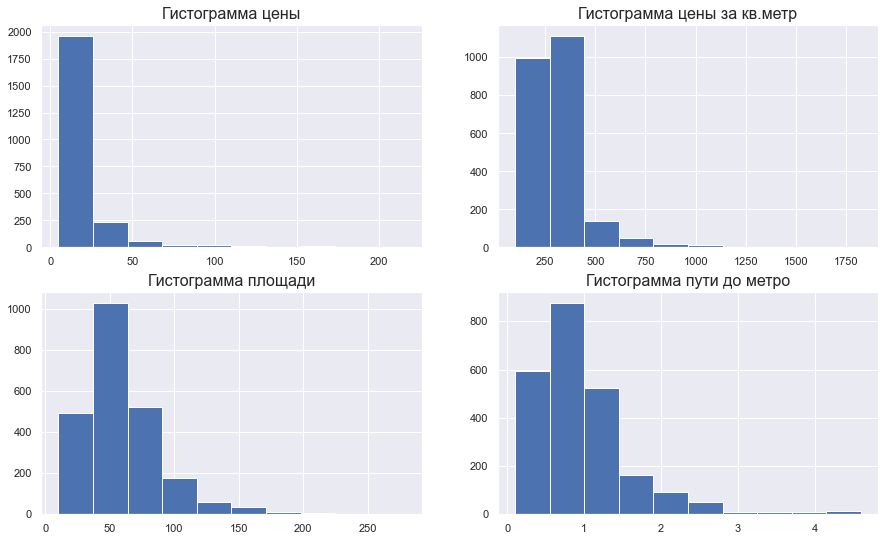

In [27]:
fig, axes = plt.subplots(2, 2, figsize=(15,9))

# Гистограмма цены.
axes[0][0].hist(df['price'])
axes[0][0].set_title('Гистограмма цены', fontsize=16)

# Гистограмма цены за квадратный метр.
axes[0][1].hist(df['price_per_square_metr'])
axes[0][1].set_title('Гистограмма цены за кв.метр', fontsize=16)

# Гистограмма площади.
axes[1][0].hist(df['square'])
axes[1][0].set_title('Гистограмма площади', fontsize=16)

# Гистограмма пути до метро.
axes[1][1].hist(df['distance_to_station'])
axes[1][1].set_title('Гистограмма пути до метро', fontsize=16)

plt.show()

Мы можем заметить, что наши данные не обладают **нормальным распределением**. Исходя из этого, для поиска коэффицента корреляции стоит применить непараметрический метод **Спирмена**.

### Коэффицент корреляции Спирмена.

In [28]:
def spearman_coeff(x, y):
    '''
    '''
    
    # Получаем значение коэффицента и p-уровня значимости.
    coeff, p_value = scipy.stats.spearmanr(x, y)
    
    coeff = np.round(coeff, 2)
    p_value = np.round(p_value, 5)
    
    if coeff > 0:
        if coeff == 1:
            print(f'coeff = {coeff} - Полная положительная корреляция.')
        else:
            if coeff >= 0.8:
                print(f'coeff = {coeff} - Сильная положительная корреляция.')
            else:
                if coeff >= 0.6:
                    print(f'coeff = {coeff} - Умеренная положительная корреляция.')
                else:
                    print(f'coeff = {coeff} - Низкая положительная корреляция.')
                
    elif coeff < 0:
        if coeff == -1:
            print(f'coeff = {coeff} - Полная отрицательная корреляция.')
        else:
            if coeff <= -0.8:
                print(f'coeff = {coeff} - Сильная отрицательная корреляция.')
            else:
                if coeff <= -0.6:
                    print(f'coeff = {coeff} - Умеренная отрицательная корреляция.')
                else:
                    print(f'coeff = {coeff} - Низкая отрицательная корреляция.')
    
    else:
        print(f'coeff = {coeff} - Зависимость между переменными отсутствует.')
    
    # Проверка p-value.
    if p_value > 0.05:
        print(f'p = {p_value} - принимаем нулевую гипотезу.')
    else:
        print(f'p = {p_value} - принимаем альтернативную гипотезу.')

### Результат проверки.

In [29]:
# Этажность-Цена.
spearman_coeff(df['total_floors'], df['price'])

coeff = 0.15 - Низкая положительная корреляция.
p = 0.0 - принимаем альтернативную гипотезу.


In [30]:
# Этажность-Цена за кв.метр.
spearman_coeff(df['total_floors'], df['price_per_square_metr'])

coeff = 0.14 - Низкая положительная корреляция.
p = 0.0 - принимаем альтернативную гипотезу.


In [31]:
# Этажность-Площадь.
spearman_coeff(df['total_floors'], df['square'])

coeff = 0.08 - Низкая положительная корреляция.
p = 0.00024 - принимаем альтернативную гипотезу.


In [32]:
# Этажность-Путь до метро.
spearman_coeff(df['total_floors'], df['distance_to_station'])

coeff = -0.04 - Низкая отрицательная корреляция.
p = 0.03274 - принимаем альтернативную гипотезу.


<div class="alert alert-warning" role="alert">
        У нас присутствуют низкие положительные/отрицательные корреляции, однако в некоторых случаях, взаимосвязи настолько низкие, что очень близки к подтверждению <b>нулевой гипотезы.</b><br>
    
В случае с <b>price.</b> и <b>price_per_square_metr</b> очевидно имеется взаимосвязь, насчёт площади и пути до метро, я неочень уверен, посему мне кажется, что как таковой там взаимосвязи и нет.
</div>

## Итог проверки гипотез.

Исходя из проверок гипотез мы выявили следующее:

<div class="alert alert-info" role="alert">
    Средняя цена 3-к квартиры в Северном и Северо-восточном округе - <b>одинаковая.</b>
</div>

<div class="alert alert-info" role="alert">
  Средний путь до метро во всех округах действительно отличается. Однако есть группы округов, где средний путь одинаковый,<br>
  а именно:
    <list>
        <ul>Средний путь до метро <b>Восточного, Западного, Северного, Северо-восточного, Северо-западного</b> и <b>Юго-восточного</b> округа одинаковый.</ul>
        <ul>Средний путь до метро <b>Южного, Юго-западного и Новомосковсокого</b> округа одинаковый</ul>
    </list>
</div>

<div class="alert alert-info" role="alert">
    Этажность влияет лишь на <b>цену недвижимости</b>, рост этажности положительно сказывается на рост цены.
</div>